In [46]:
require(wordcloud)

Loading required package: wordcloud

Warning message:
“package ‘wordcloud’ was built under R version 4.0.2”
Loading required package: RColorBrewer

Warning message:
“package ‘RColorBrewer’ was built under R version 4.0.2”


In [87]:
require(tidyverse)

Loading required package: tidyverse

Warning message:
“package ‘tidyverse’ was built under R version 4.0.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.3.1     

Warning message:
“package ‘ggplot2’ was built under R version 4.0.2”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘readr’ was built under R version 4.0.2”
Warning message:
“package ‘purrr’ was built under R version 4.0.2”
Warning message:
“package ‘forcats’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tibble::as_data_frame() masks igraph::as_data_frame(), dplyr::as_data_frame()
✖ purrr::compose()        masks igraph::compose()
✖ tidyr::crossing()       masks igraph::crossing()
✖ dplyr::fi

In [1]:
require(gutenbergr)

require(tidytext)

require(dplyr)

require(curl)

require(igraph)

require(networkD3)

Loading required package: gutenbergr

Warning message:
“package ‘gutenbergr’ was built under R version 4.0.2”
Loading required package: tidytext

Warning message:
“package ‘tidytext’ was built under R version 4.0.2”
Loading required package: dplyr

Warning message:
“package ‘dplyr’ was built under R version 4.0.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: curl

Warning message:
“package ‘curl’ was built under R version 4.0.1”
Loading required package: igraph

Warning message:
“package ‘igraph’ was built under R version 4.0.2”

Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading requir

In [2]:
bookx <- gutenberg_download(c(19322))

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest

Using mirror http://aleph.gutenberg.org



In [11]:
book <- bookx

In [12]:
which(grepl("MENCKEN", book$text))

[1]  24  54 603

In [13]:
book[600:610, 2]

text
<chr>
"for criticism, and to Messrs. Common and Ludovici for showing me the way"
around many a difficulty.
""
H. L. MENCKEN.
""
""
""
""
PREFACE


In [14]:
which(grepl("PREFACE", book$text))

[1]  55 608

In [15]:
book[608:650,2]

text
<chr>
PREFACE
""
""
This book belongs to the most rare of men. Perhaps not one of them is
yet alive. It is possible that they may be among those who understand my
"""Zarathustra"": how _could_ I confound myself with those who are now"
sprouting ears?--First the day after tomorrow must come for me. Some men
are born posthumously.
""


In [16]:
book <- book[-seq(from=1, to=607, by=1), ]

In [17]:
book$text <- gsub(x = book$text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = " ")

In [18]:
chars <- book %>% unnest_tokens(chars, text, "characters")

In [19]:
words <- book %>% unnest_tokens(words, text, "words")

In [20]:
words <- words %>% filter(!words %in% stop_words$word)

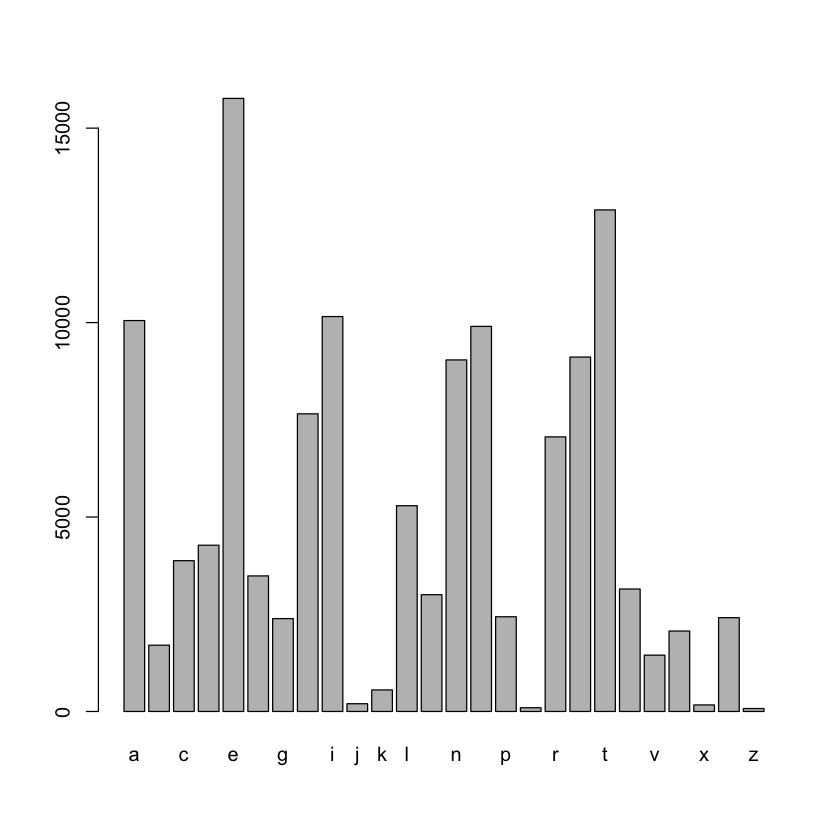

In [21]:
barplot(table(chars$chars))

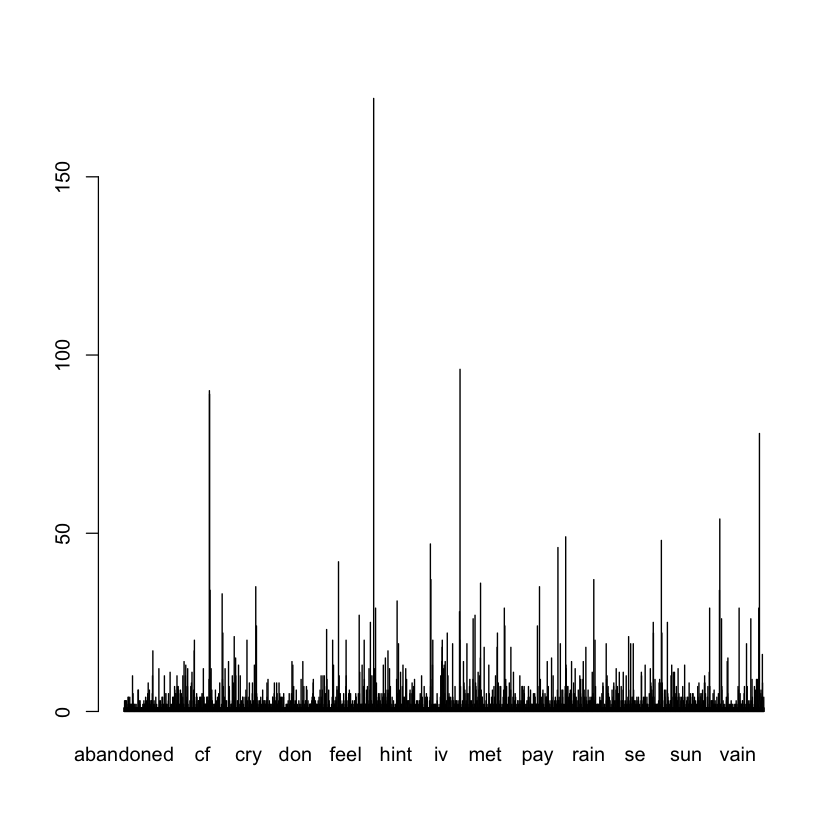

In [23]:
barplot(table(words$words))

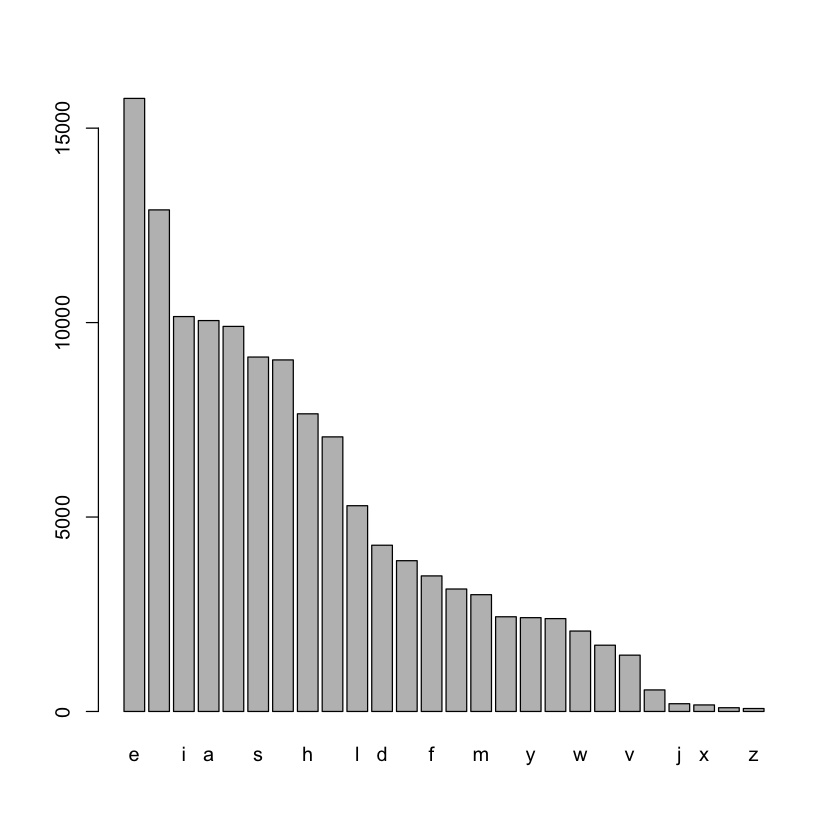

In [24]:
barplot(sort(table(chars$chars), decreasing=TRUE))

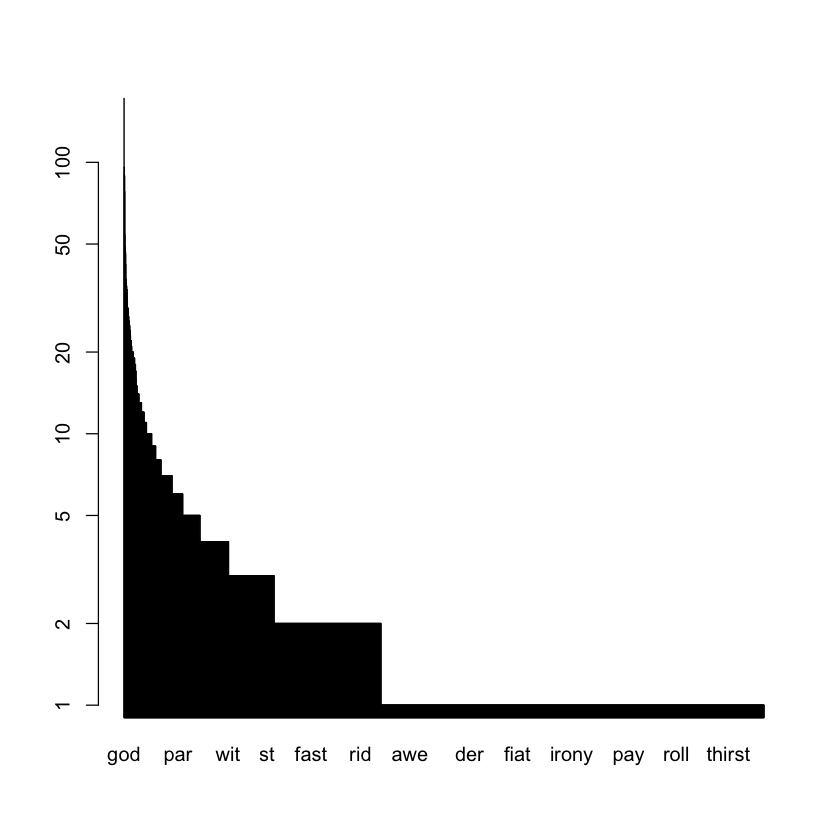

In [26]:
barplot(sort(table(words$words), decreasing=TRUE), log="y")

In [27]:
df_chars <- as.data.frame(table(chars$chars))

In [28]:
summary(df_chars$Freq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     76    1795    3318    4933    8694   15765 

In [29]:
freq_chars <- df_chars[df_chars$Freq > 3318,]

In [30]:
freq_chars <- freq_chars[order(freq_chars$Freq, decreasing=TRUE),]

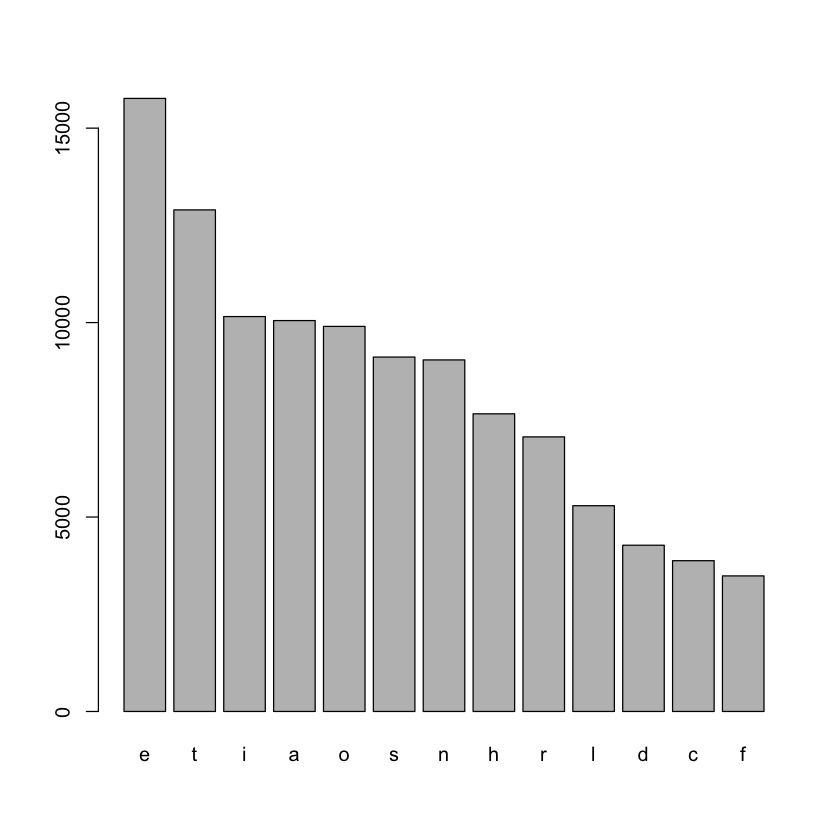

In [31]:
barplot(freq_chars$Freq, names.arg = freq_chars$Var1)

In [32]:
names(freq_chars) = c('letter', 'freq')

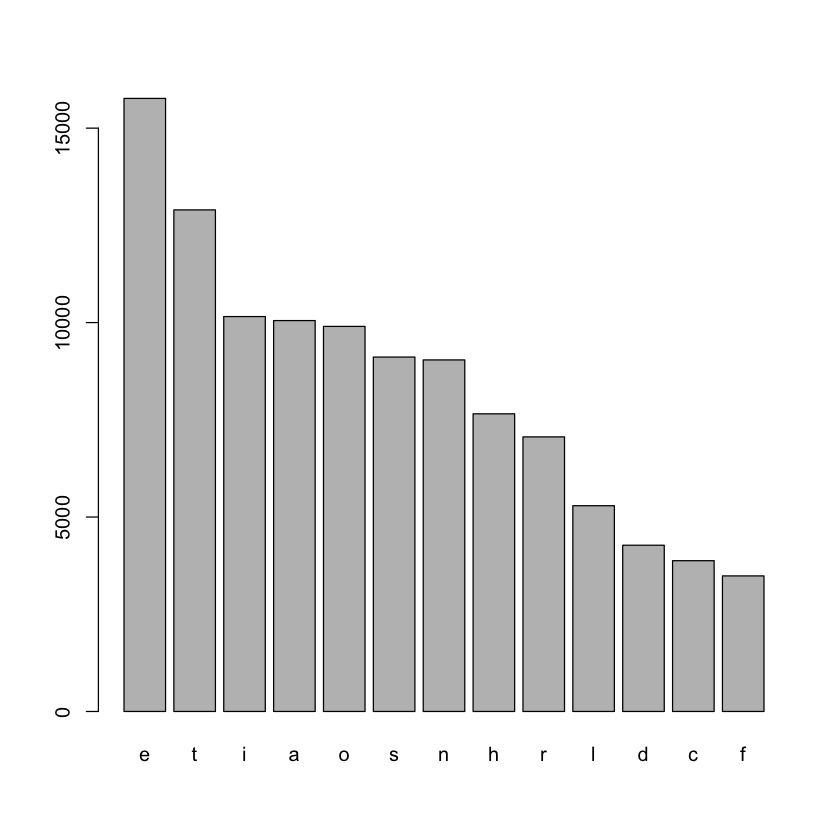

In [33]:
barplot(freq_chars$freq, names.arg=freq_chars$letter)

In [34]:
df_words <- as.data.frame(table(words$words))

In [35]:
names(df_words) <- c("words", "freq")

In [36]:
df_words <- df_words[order(df_words$freq, decreasing=TRUE),]

In [37]:
summary(df_words$freq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   2.691   2.000 172.000 

In [42]:
quantile(df_words$freq, .95)

95% 
  8

In [49]:
freq_words <- df_words[df_words$freq > 8, ]

In [51]:
head(freq_words)

,words,freq
,<fct>,<int>
1449,god,172
1950,life,96
496,christian,90
497,christianity,89
3687,world,78
3457,truth,54


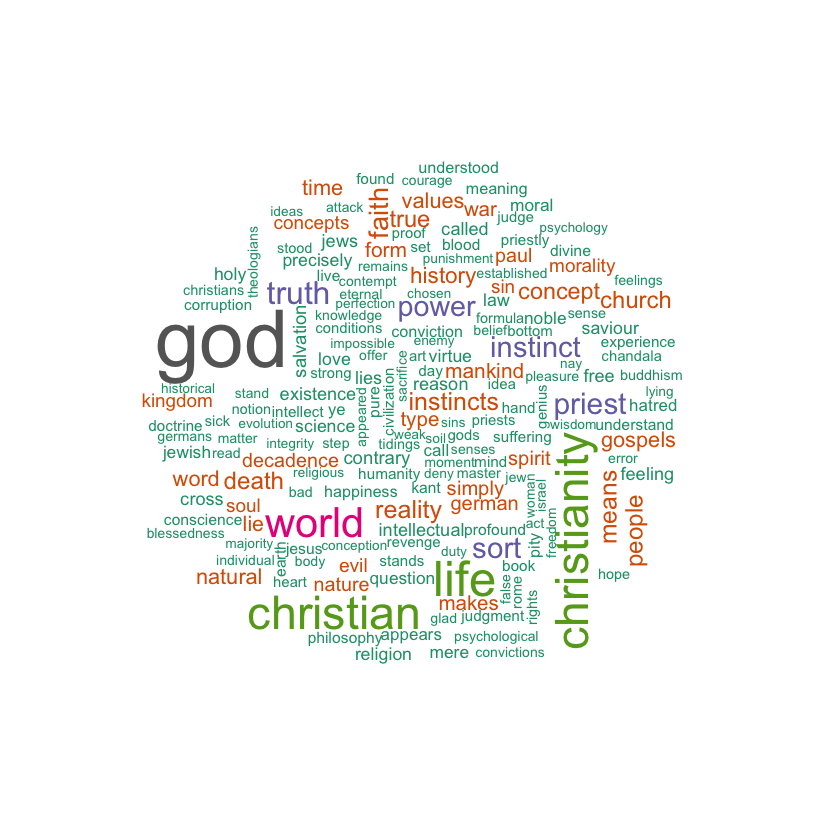

In [68]:
wordcloud(
  words = freq_words$words, 
  freq = freq_words$freq, 
  colors = brewer.pal(8, 'Dark2')
)

In [80]:
word_pairs <- book %>% 
  unnest_tokens(
    input = text, 
    output = bigram, 
    token = 'ngrams', 
    n = 2
  ) %>% 
  filter(! is.na(bigram))

In [ ]:
words <- words %>% filter(!words %in% stop_words$word)

In [95]:
word_pairs <- word_pairs %>% 
  separate(col = bigram, into = c('word1', 'word2'), sep = ' ')%>% 
  filter(! word1 %in% stop_words$word) %>% 
  filter(! word2 %in% stop_words$word) %>% 
  filter(! is.na(word1)) %>% 
  filter(! is.na(word2)) 

In [116]:
word_pairs_count <- word_pairs %>% 
  count(word1, word2, sort = TRUE) %>% 
  rename(weight = n)

In [117]:
summary(word_pairs_count$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    1.07    1.00   10.00 

In [118]:
word_pairs_count <- word_pairs_count[word_pairs_count$weight > 1, ]

In [119]:
network <- word_pairs_count %>% graph_from_data_frame(directed = FALSE)

In [120]:
is.weighted(network)

[1] TRUE

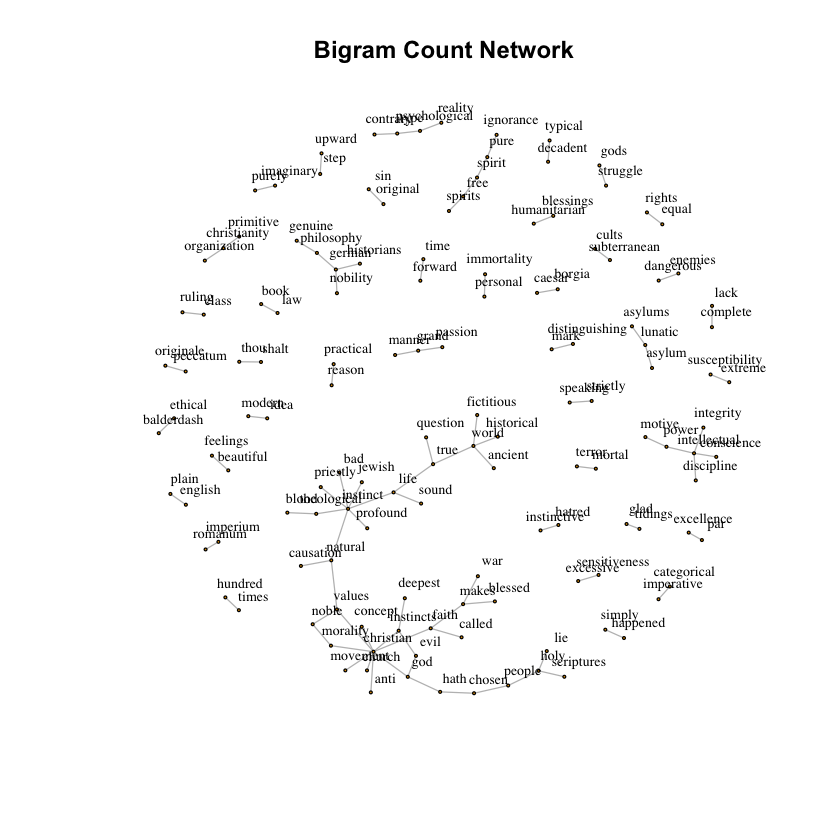

In [121]:
 plot(
  network, 
  vertex.size = 1,
  vertex.label.color = 'black', 
  vertex.label.cex = 0.7, 
  vertex.label.dist = 1,
  edge.color = 'gray', 
  main = 'Bigram Count Network', 
  alpha = 50
)

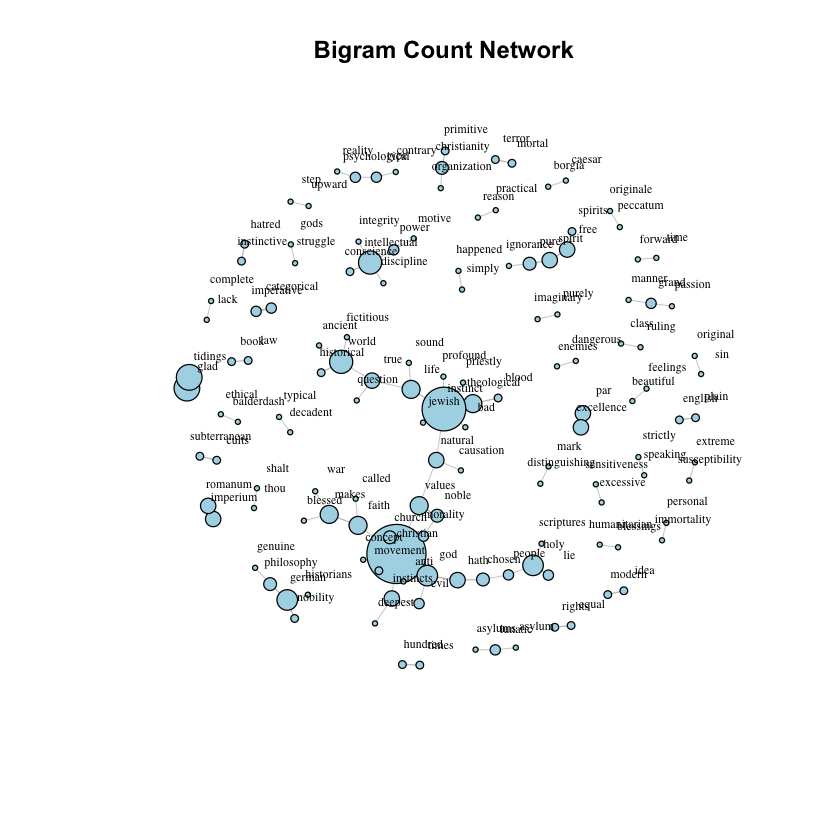

In [122]:
# Store the degree.
V(network)$degree <- strength(graph = network)

# Compute the weight shares.
E(network)$width <- E(network)$weight/max(E(network)$weight)

plot(
  network, 
  vertex.color = 'lightblue',
  # Scale node size by degree.
  vertex.size = 1*V(network)$degree,
  vertex.label.color = 'black', 
  vertex.label.cex = 0.6, 
  vertex.label.dist = 1.6,
  edge.color = 'gray', 
  # Set edge width proportional to the weight relative value.
  edge.width = 3*E(network)$width ,
  main = 'Bigram Count Network', 
  alpha = 50
    )

In [130]:
vertices_large_component <- groups(components(network))$'4'

In [133]:
large_component <- induced_subgraph(network, vids=vertices_large_component)

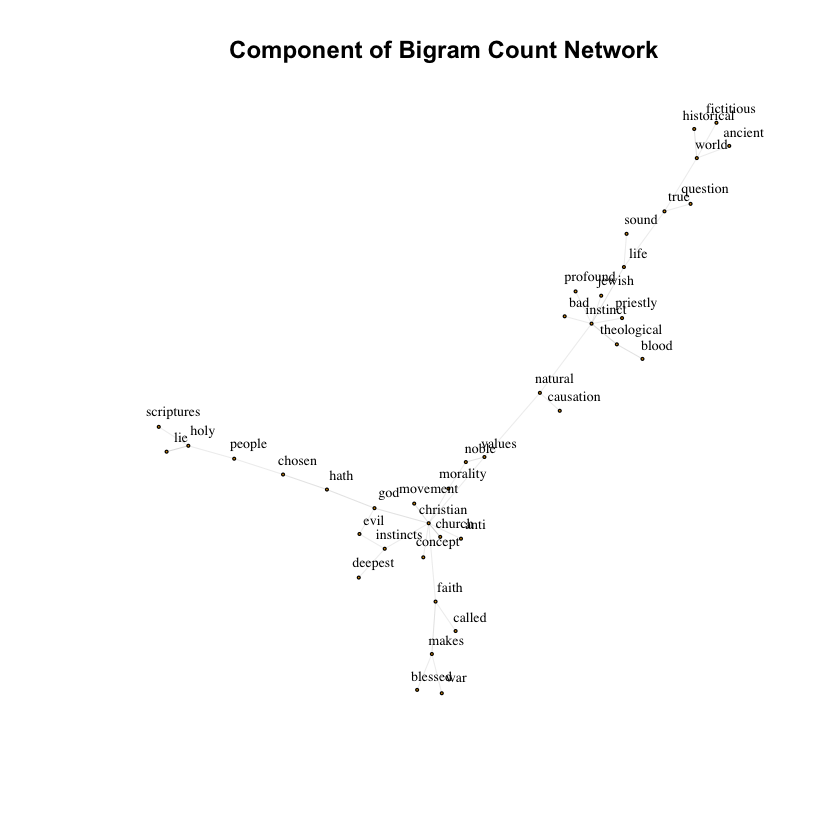

In [134]:
 plot(
  large_component, 
  vertex.size = 1,
  vertex.label.color = 'black', 
  vertex.label.cex = 0.7, 
  vertex.label.dist = 1,
  edge.color = 'gray', 
  main = 'Component of Bigram Count Network', 
  alpha = 50
)

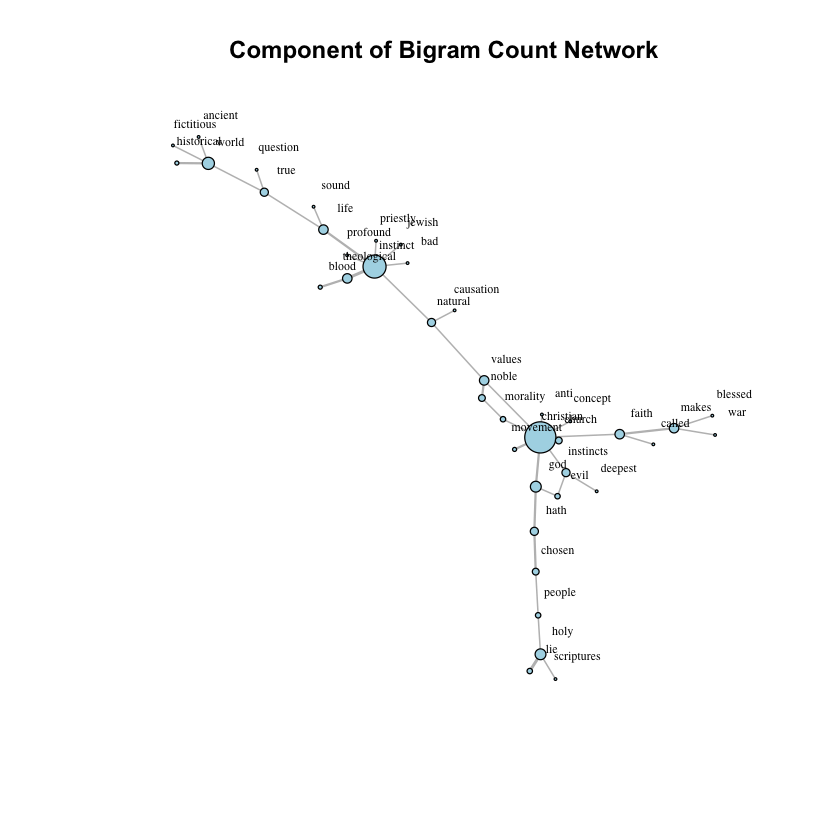

In [136]:
# Store the degree.
V(large_component)$degree <- strength(graph = large_component)

# Compute the weight shares.
E(large_component)$width <- E(large_component)$weight/max(E(large_component)$weight)

plot(
  large_component, 
  vertex.color = 'lightblue',
  # Scale node size by degree.
  vertex.size = .5*V(large_component)$degree,
  vertex.label.color = 'black', 
  vertex.label.cex = 0.6, 
  vertex.label.dist = 1.6,
  edge.color = 'gray', 
  # Set edge width proportional to the weight relative value.
  edge.width = 3*E(large_component)$width ,
  main = 'Component of Bigram Count Network', 
  alpha = 50
    )